In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import chardet
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

In [2]:
with open('./winequality-white.csv','rb') as f:
    resultado = chardet.detect(f.read(20000))
    encoding = resultado['encoding']
    print(f"el archivo .CSV tiene de encondig: {encoding}")

el archivo .CSV tiene de encondig: ascii


In [3]:
df = pd.read_csv("./winequality-white.csv",encoding=encoding, delimiter=";")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.shape

(4898, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
df.iloc[5:31]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5             8.1              0.28         0.40            6.90      0.050   
6             6.2              0.32         0.16            7.00      0.045   
7             7.0              0.27         0.36           20.70      0.045   
8             6.3              0.30         0.34            1.60      0.049   
9             8.1              0.22         0.43            1.50      0.044   
10            8.1              0.27         0.41            1.45      0.033   
11            8.6              0.23         0.40            4.20      0.035   
12            7.9              0.18         0.37            1.20      0.040   
13            6.6              0.16         0.40            1.50      0.044   
14            8.3              0.42         0.62           19.25      0.040   
15            6.6              0.17         0.38            1.50      0.032   
16            6.3              0.48         0.04            1.10      0.046   
17            6.2              0.66         0.48            1.20      0.029   
18            7.4              0.34         0.42            1.10      0.033   
19            6.5              0.31         0.14            7.50      0.044   
20            6.2              0.66         0.48            1.20      0.029   
21            6.4              0.31         0.38            2.90      0.038   
22            6.8              0.26         0.42            1.70      0.049   
23            7.6              0.67         0.14            1.50      0.074   
24            6.6              0.27         0.41            1.30      0.052   
25            7.0              0.25         0.32            9.00      0.046   
26            6.9              0.24         0.35            1.00      0.052   
27            7.0              0.28         0.39            8.70      0.051   
28            7.4              0.27         0.48            1.10      0.047   
29            7.2              0.32         0.36            2.00      0.033   
30            8.5              0.24         0.39           10.40      0.044   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
5                  30.0                  97.0   0.9951  3.26       0.44   
6                  30.0                 136.0   0.9949  3.18       0.47   
7                  45.0                 170.0   1.0010  3.00       0.45   
8                  14.0                 132.0   0.9940  3.30       0.49   
9                  28.0                 129.0   0.9938  3.22       0.45   
10                 11.0                  63.0   0.9908  2.99       0.56   
11                 17.0                 109.0   0.9947  3.14       0.53   
12                 16.0                  75.0   0.9920  3.18       0.63   
13                 48.0                 143.0   0.9912  3.54       0.52   
14                 41.0                 172.0   1.0002  2.98       0.67   
15                 28.0                 112.0   0.9914  3.25       0.55   
16                 30.0                  99.0   0.9928  3.24       0.36   
17                 29.0                  75.0   0.9892  3.33       0.39   
18                 17.0                 171.0   0.9917  3.12       0.53   
19                 34.0                 133.0   0.9955  3.22       0.50   
20                 29.0                  75.0   0.9892  3.33       0.39   
21                 19.0                 102.0   0.9912  3.17       0.35   
22                 41.0                 122.0   0.9930  3.47       0.48   
23                 25.0                 168.0   0.9937  3.05       0.51   
24                 16.0                 142.0   0.9951  3.42       0.47   
25                 56.0                 245.0   0.9955  3.25       0.50   
26                 35.0                 146.0   0.9930  3.45       0.44   
27                 32.0                 141.0   0.9961  3.38       0.53   
28                 17.0                 132.0   0.9914  3.19       0.4

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.duplicated().sum()

937

In [10]:
df[df.duplicated()]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.2              0.23         0.32             8.5      0.058   
5               8.1              0.28         0.40             6.9      0.050   
7               7.0              0.27         0.36            20.7      0.045   
8               6.3              0.30         0.34             1.6      0.049   
20              6.2              0.66         0.48             1.2      0.029   
...             ...               ...          ...             ...        ...   
4828            6.4              0.23         0.35            10.3      0.042   
4850            7.0              0.36         0.35             2.5      0.048   
4851            6.4              0.33         0.44             8.9      0.055   
4856            7.1              0.23         0.39            13.7      0.058   
4880            6.6              0.34         0.40             8.1      0.046   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    47.0                 186.0  0.99560  3.19       0.40   
5                    30.0                  97.0  0.99510  3.26       0.44   
7                    45.0                 170.0  1.00100  3.00       0.45   
8                    14.0                 132.0  0.99400  3.30       0.49   
20                   29.0                  75.0  0.98920  3.33       0.39   
...                   ...                   ...      ...   ...        ...   
4828                 54.0                 140.0  0.99670  3.23       0.47   
4850                 67.0                 161.0  0.99146  3.05       0.56   
4851                 52.0                 164.0  0.99488  3.10       0.48   
4856                 26.0                 172.0  0.99755  2.90       0.46   
4880                 68.0                 170.0  0.99494  3.15       0.50   

        alcohol  quality  
4      9.900000        6  
5     10.100000        6  
7      8.800000        6  
8      9.500000        6  
20    12.800000        8  
...         ...      ...  
4828   9.200000        5  
4850  11.100000        6  
4851   9.600000        5  
4856   9.000000        6  
4880   9.533333        6  

[937 rows x 12 columns]

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            106.000000     0.991620   
50%       0.042000            33.000000            133.000000     0.993500   
75%       0.050000            45.000000            166.000000     0.995710   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  3961.000000  3961.000000  3961.000000  3961.000000  
mean      3.195458     0.490351    10.589358     5.854835  
std       0.151546     0.113523     1.217076     0.890683  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.480000    10.400000     6.000000  
75%       3.290000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [13]:
corr = df.corr()

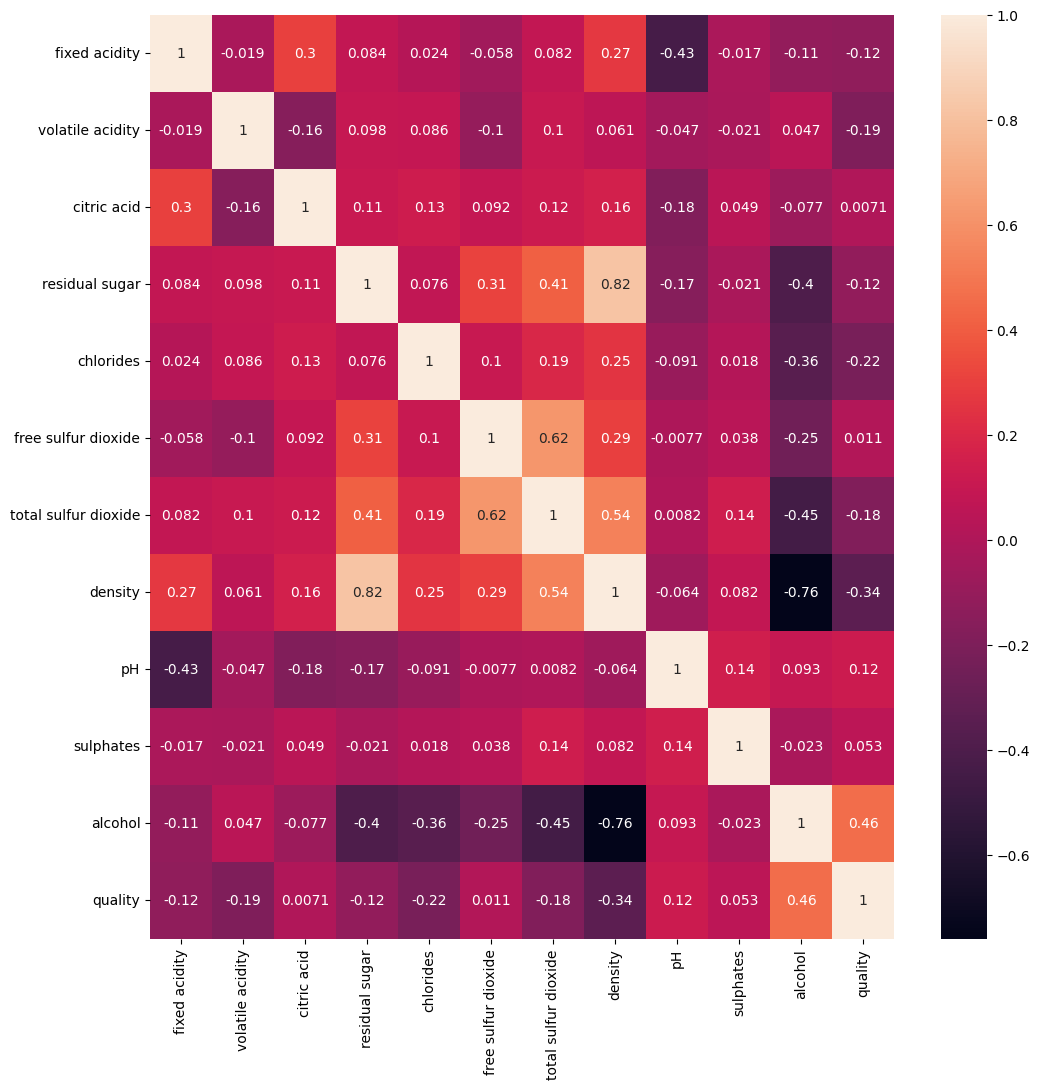

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,linecolor='black')
plt.show()

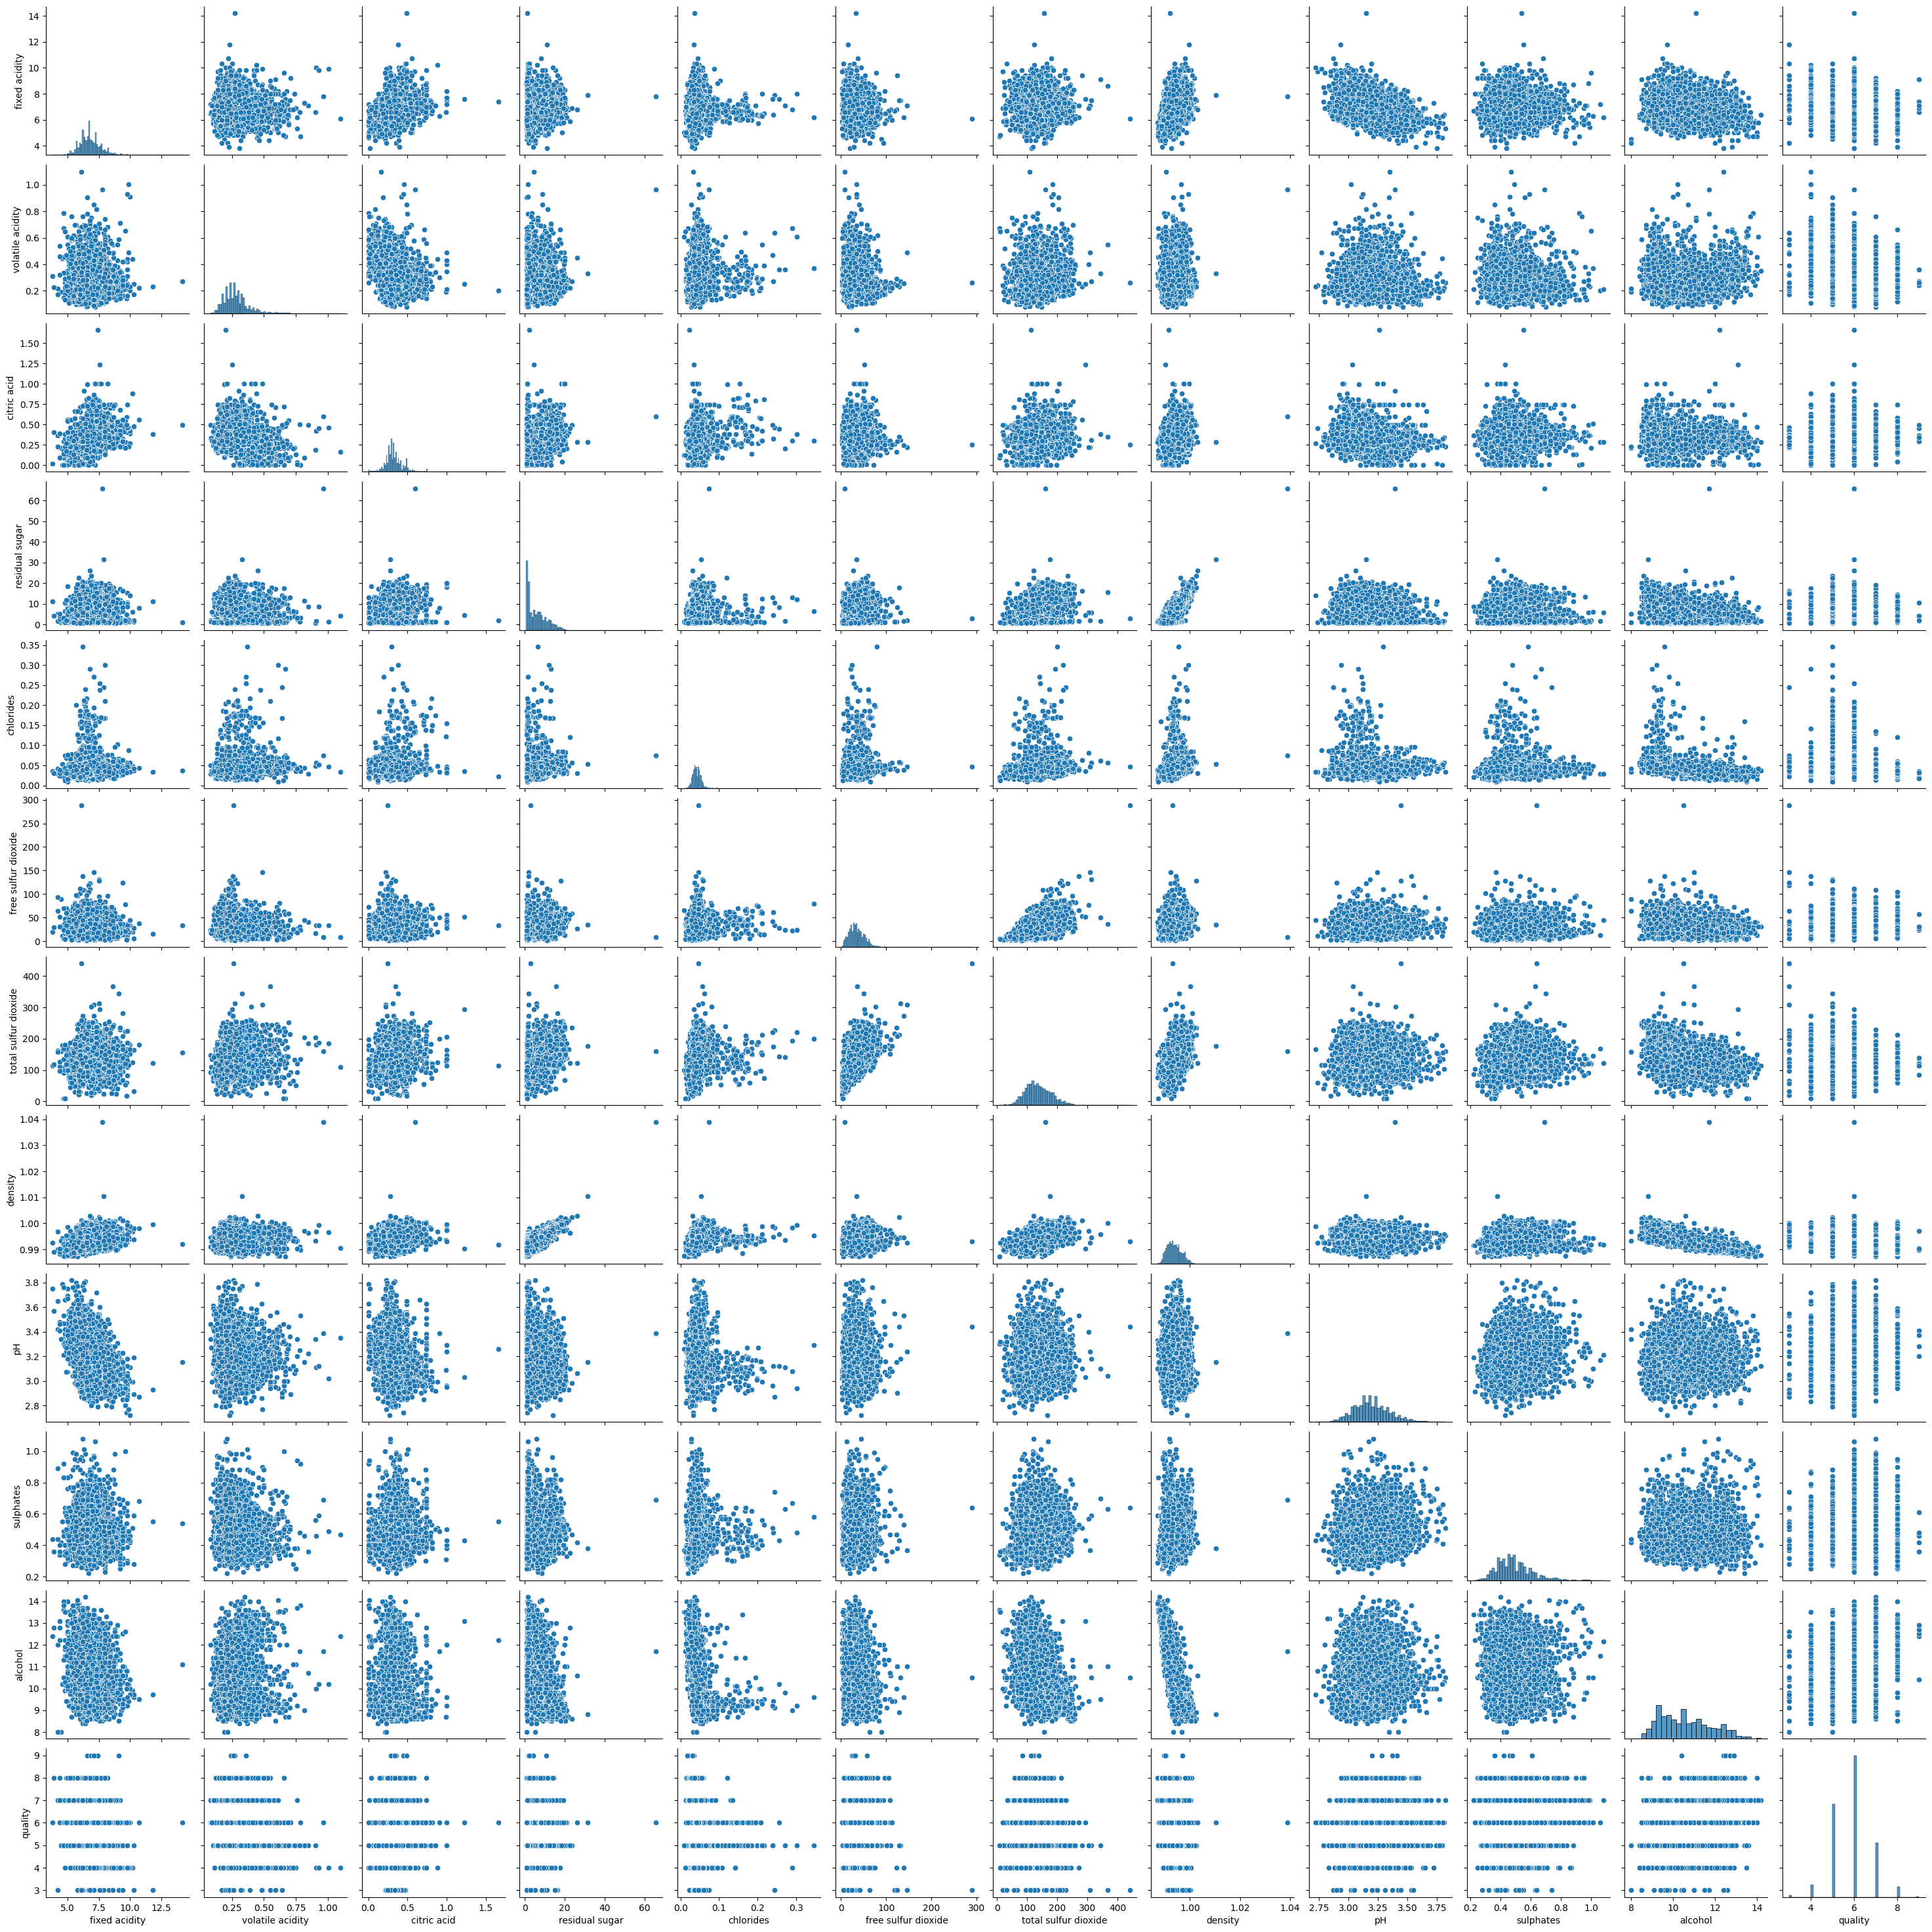

In [15]:
sns.pairplot(df)
plt.show()

In [16]:
# Descripcion estadistica de la variable objetivo 
descripcion = df['quality'].describe()
print(f"estadisticas de quality: \n {descripcion}" )

estadisticas de quality: 
 count    3961.000000
mean        5.854835
std         0.890683
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


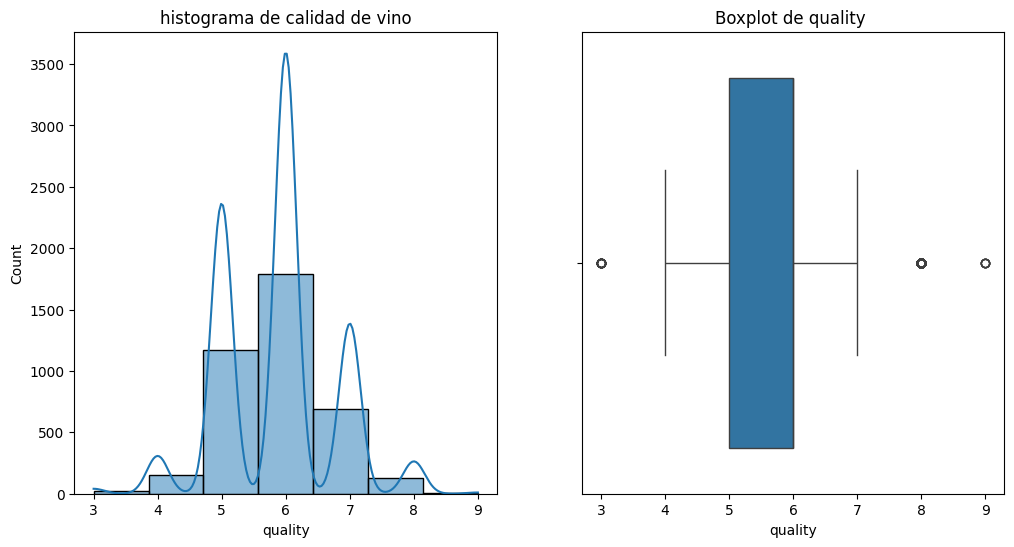

In [17]:
# visualizamos la dsitribucion de la variable objetivo
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(df['quality'],bins=7, kde=True)
plt.title('histograma de calidad de vino')

plt.subplot(1,2,2)
sns.boxplot(x=df['quality'])
plt.title('Boxplot de quality ')

plt.show()

In [18]:
# Dividimos los datos en caracteristicas(X) y variable objetivo (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Dividr los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)
y_pred

array([6.36959317, 5.52124018, 5.37018278, 5.61829253, 6.27993541,
       5.79222766, 6.11888954, 5.32468231, 5.67330762, 6.26060246,
       5.33324751, 5.97842109, 5.89998493, 5.56374205, 5.40331437,
       5.82924029, 5.35100822, 6.35064435, 5.39697004, 5.25623935,
       5.49777082, 5.36329565, 6.65131742, 5.73194085, 6.20292665,
       6.31052041, 6.07447021, 5.69092024, 5.51262391, 6.21127424,
       5.88920909, 4.98527892, 5.64887511, 5.33424456, 5.74415806,
       5.61222762, 6.76260857, 5.86763275, 4.97860342, 6.12345374,
       5.79440827, 6.33008006, 5.81858224, 5.55404934, 5.05992508,
       5.39873953, 5.67570869, 5.885051  , 5.64116216, 5.7849679 ,
       6.36927919, 6.61194225, 5.97036263, 6.02949093, 5.64740634,
       5.79528027, 5.45493513, 6.24843351, 6.40831607, 5.67876143,
       5.77999608, 5.13663282, 5.42008156, 5.92007787, 6.35878216,
       5.87474685, 5.55268966, 4.73211933, 6.026545  , 5.83066628,
       6.2716034 , 6.63024308, 6.66163714, 6.09142988, 4.80868

In [20]:
# Evaluar el rendimiento del modelo 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coeficiente de Determinación (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.6071319565451987
Mean Absolute Error (MAE): 0.5973645217257024
Coeficiente de Determinación (R²): 0.2597097667382311
Root Mean Squared Error (RMSE): 0.7791867276495402


In [21]:
# Resumen del modelo
print("\nIntercepto:", model.intercept_)
print("Coeficientes:", model.coef_)


Intercepto: 107.58227097344897
Coeficientes: [ 2.62152597e-02 -1.70729340e+00  2.66985683e-01  5.80428341e-02
 -6.30692775e-01  6.53055760e-03 -7.61456076e-04 -1.07706049e+02
  6.77471957e-01  5.97459600e-01  2.47267098e-01]


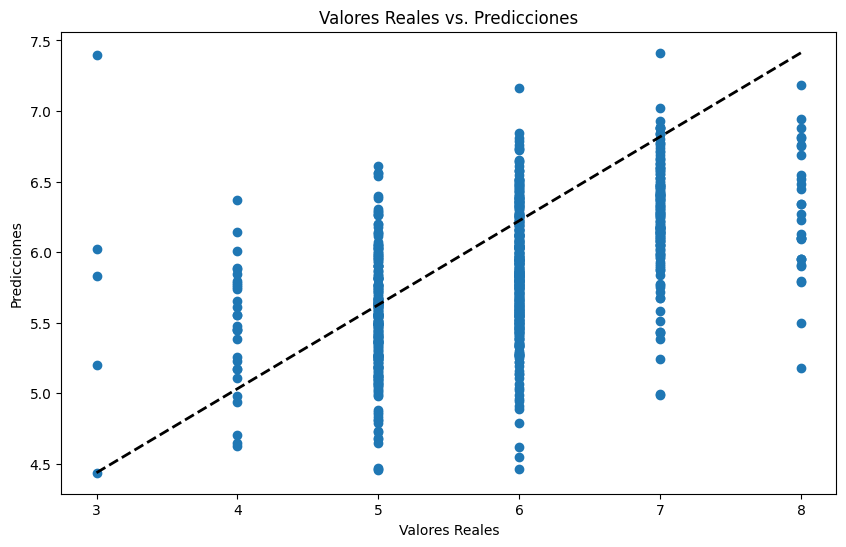

In [22]:
# Visualizar las predicciones vs. los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()

In [23]:
df_test = df.copy()
df_test = df_test.sample(frac=0.8)
df_test.drop(columns='quality',inplace=True)
df_test

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2025            7.5             0.300         0.71             1.3      0.160   
612             7.5             0.230         0.68            11.0      0.047   
3074            6.6             0.250         0.33             8.5      0.042   
999             7.6             0.210         0.60             2.1      0.046   
42              7.0             0.310         0.26             7.4      0.069   
...             ...               ...          ...             ...        ...   
4606            6.9             0.290         0.32             5.8      0.040   
3630            6.6             0.300         0.25             8.0      0.036   
397             6.3             0.200         0.40             1.5      0.037   
2408            7.5             0.705         0.10            13.0      0.044   
2711            5.6             0.200         0.22             1.3      0.049   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2025                 44.0                 149.0  0.99480  3.08       0.42   
612                  37.0                 133.0  0.99780  2.99       0.38   
3074                 29.0                 141.0  0.99546  3.28       0.60   
999                  47.0                 165.0  0.99360  3.05       0.54   
42                   28.0                 160.0  0.99540  3.13       0.46   
...                   ...                   ...      ...   ...        ...   
4606                 16.0                 112.0  0.99300  3.04       0.58   
3630                 21.0                 124.0  0.99362  3.06       0.38   
397                  35.0                 107.0  0.99170  3.46       0.50   
2408                 44.0                 214.0  0.99741  3.10       0.50   
2711                 25.0                 155.0  0.99296  3.74       0.43   

      alcohol  
2025      8.9  
612       8.8  
3074     10.4  
999      10.1  
42        9.8  
...       ...  
4606     11.2  
3630     10.8  
397      11.4  
2408      9.1  
2711     10.0  

[3169 rows x 11 columns]

In [24]:
df_test['quality_pred'] = model.predict(df_test)
pd.DataFrame(df_test)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2025            7.5             0.300         0.71             1.3      0.160   
612             7.5             0.230         0.68            11.0      0.047   
3074            6.6             0.250         0.33             8.5      0.042   
999             7.6             0.210         0.60             2.1      0.046   
42              7.0             0.310         0.26             7.4      0.069   
...             ...               ...          ...             ...        ...   
4606            6.9             0.290         0.32             5.8      0.040   
3630            6.6             0.300         0.25             8.0      0.036   
397             6.3             0.200         0.40             1.5      0.037   
2408            7.5             0.705         0.10            13.0      0.044   
2711            5.6             0.200         0.22             1.3      0.049   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2025                 44.0                 149.0  0.99480  3.08       0.42   
612                  37.0                 133.0  0.99780  2.99       0.38   
3074                 29.0                 141.0  0.99546  3.28       0.60   
999                  47.0                 165.0  0.99360  3.05       0.54   
42                   28.0                 160.0  0.99540  3.13       0.46   
...                   ...                   ...      ...   ...        ...   
4606                 16.0                 112.0  0.99300  3.04       0.58   
3630                 21.0                 124.0  0.99362  3.06       0.38   
397                  35.0                 107.0  0.99170  3.46       0.50   
2408                 44.0                 214.0  0.99741  3.10       0.50   
2711                 25.0                 155.0  0.99296  3.74       0.43   

      alcohol  quality_pred  
2025      8.9      4.996936  
612       8.8      5.276474  
3074     10.4      5.900567  
999      10.1      5.726926  
42        9.8      5.360890  
...       ...           ...  
4606     11.2      5.907429  
3630     10.8      5.745908  
397      11.4      6.373124  
2408      9.1      4.675074  
2711     10.0      5.851670  

[3169 rows x 12 columns]

In [25]:
result_merge = pd.merge(df, df_test, left_index=True, right_index=True, how='inner')
result_merge

fixed acidity_x  volatile acidity_x  citric acid_x  residual sugar_x  \
0                 7.0                0.27           0.36              20.7   
1                 6.3                0.30           0.34               1.6   
2                 8.1                0.28           0.40               6.9   
3                 7.2                0.23           0.32               8.5   
6                 6.2                0.32           0.16               7.0   
...               ...                 ...            ...               ...   
4891              5.7                0.21           0.32               0.9   
4892              6.5                0.23           0.38               1.3   
4895              6.5                0.24           0.19               1.2   
4896              5.5                0.29           0.30               1.1   
4897              6.0                0.21           0.38               0.8   

      chlorides_x  free sulfur dioxide_x  total sulfur dioxide_x  density_x  \
0           0.045                   45.0                   170.0    1.00100   
1           0.049                   14.0                   132.0    0.99400   
2           0.050                   30.0                    97.0    0.99510   
3           0.058                   47.0                   186.0    0.99560   
6           0.045                   30.0                   136.0    0.99490   
...           ...                    ...                     ...        ...   
4891        0.038                   38.0                   121.0    0.99074   
4892        0.032                   29.0                   112.0    0.99298   
4895        0.041                   30.0                   111.0    0.99254   
4896        0.022                   20.0                   110.0    0.98869   
4897        0.020                   22.0                    98.0    0.98941   

      pH_x  sulphates_x  ...  citric acid_y  residual sugar_y  chlorides_y  \
0     3.00         0.45  ...           0.36              20.7        0.045   
1     3.30         0.49  ...           0.34               1.6        0.049   
2     3.26         0.44  ...           0.40               6.9        0.050   
3     3.19         0.40  ...           0.32               8.5        0.058   
6     3.18         0.47  ...           0.16               7.0        0.045   
...    ...          ...  ...            ...               ...          ...   
4891  3.24         0.46  ...           0.32               0.9        0.038   
4892  3.29         0.54  ...           0.38               1.3        0.032   
4895  2.99         0.46  ...           0.19               1.2        0.041   
4896  3.34         0.38  ...           0.30               1.1        0.022   
4897  3.26         0.32  ...           0.38               0.8        0.020   

      free sulfur dioxide_y  total sulfur dioxide_y  density_y  pH_y  \
0                      45.0                   170.0    1.00100  3.00   
1                      14.0                   132.0    0.99400  3.30   
2                      30.0                    97.0    0.99510  3.26   
3                      47.0                   186.0    0.99560  3.19   
6                      30.0                   136.0    0.99490  3.18   
...                     ...                     ...        ...   ...   
4891                   38.0                   121.0    0.99074  3.24   
4892                   29.0                   112.0    0.99298  3.29   
4895                   30.0                   111.0    0.99254  2.99   
4896                   20.0                   110.0    0.98869  3.34   
4897                   22.0                    98.0    0.98941  3.26   

      sulphates_y  alcohol_y  quality_pred  
0            0.45        8.8      5.401924  
1            0.49        9.5      5.196531  
2            0.44       10.1      5.704932  
3            0.40        9.9      5.701789  
6            0.47        9.6      5.363649  
...           ...        ...           ...  
489

In [26]:
comparacion = result_merge[['quality','quality_pred']].copy()
comparacion['diferencia'] = comparacion['quality_pred'] - comparacion['quality']
comparacion

quality  quality_pred  diferencia
0           6      5.401924   -0.598076
1           6      5.196531   -0.803469
2           6      5.704932   -0.295068
3           6      5.701789   -0.298211
6           6      5.363649   -0.636351
...       ...           ...         ...
4891        6      6.025079    0.025079
4892        5      5.620873    0.620873
4895        6      5.271056   -0.728944
4896        7      6.575174   -0.424826
4897        6      6.337411    0.337411

[3169 rows x 3 columns]

In [27]:
x1= comparacion['quality']
x2= comparacion['quality_pred']
y= comparacion.index

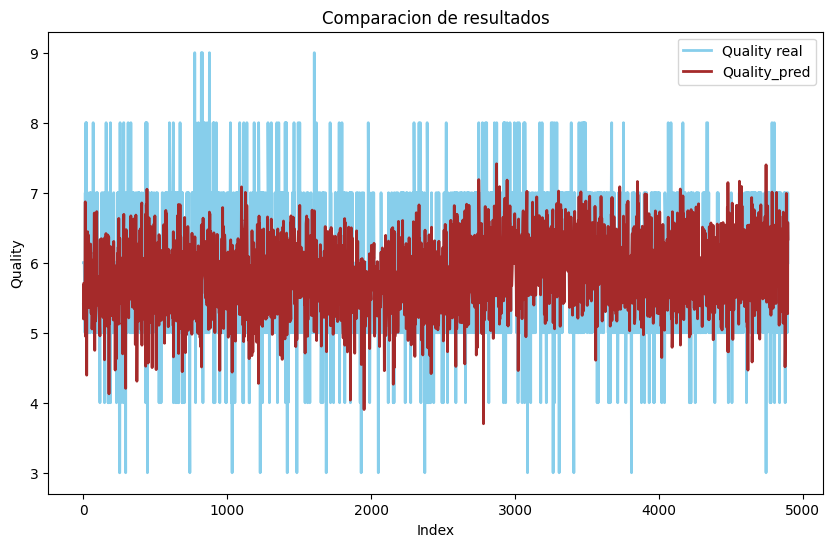

In [28]:
# Crear el gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Quality real
plt.plot(y, x1, label='Quality real', color='skyblue', linewidth=2)
# Predicciones
plt.plot(y, x2, label='Quality_pred', color='brown', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Index')
plt.ylabel('Quality')
plt.title('Comparacion de resultados')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

### REGRESION LINEAL DATA SIN OUTLIERS

In [29]:
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
df = df.copy()

Q1 = df['quality'].quantile(0.25)
Q3 = df['quality'].quantile(0.75)

# Calcular el IQR (Inter Quartile Range)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para excluir los outliers
df_sin_otl = df[(df['quality'] >= lower_bound) & (df['quality'] <= upper_bound)]
df_sin_otl.reset_index()

index  fixed acidity  volatile acidity  citric acid  residual sugar  \
0         0            7.0              0.27         0.36            20.7   
1         1            6.3              0.30         0.34             1.6   
2         2            8.1              0.28         0.40             6.9   
3         3            7.2              0.23         0.32             8.5   
4         6            6.2              0.32         0.16             7.0   
...     ...            ...               ...          ...             ...   
3800   4893            6.2              0.21         0.29             1.6   
3801   4894            6.6              0.32         0.36             8.0   
3802   4895            6.5              0.24         0.19             1.2   
3803   4896            5.5              0.29         0.30             1.1   
3804   4897            6.0              0.21         0.38             0.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.045                 30.0                 136.0  0.99490  3.18   
...         ...                  ...                   ...      ...   ...   
3800      0.039                 24.0                  92.0  0.99114  3.27   
3801      0.047                 57.0                 168.0  0.99490  3.15   
3802      0.041                 30.0                 111.0  0.99254  2.99   
3803      0.022                 20.0                 110.0  0.98869  3.34   
3804      0.020                 22.0                  98.0  0.98941  3.26   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.47      9.6        6  
...         ...      ...      ...  
3800       0.50     11.2        6  
3801       0.46      9.6        5  
3802       0.46      9.4        6  
3803       0.38     12.8        7  
3804       0.32     11.8        6  

[3805 rows x 13 columns]

In [30]:
df_corr = df_sin_otl.corr()

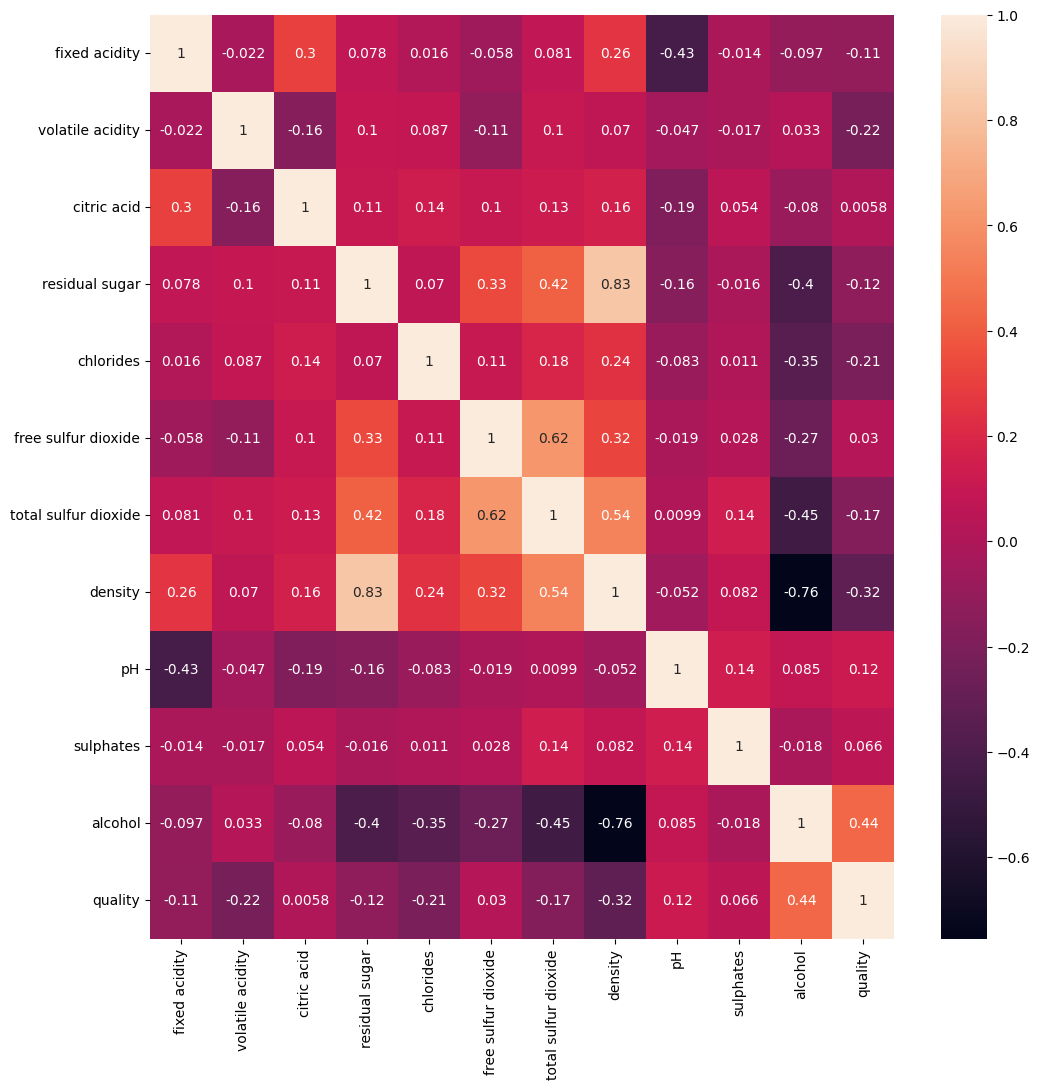

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(df_corr, annot=True)
plt.show()

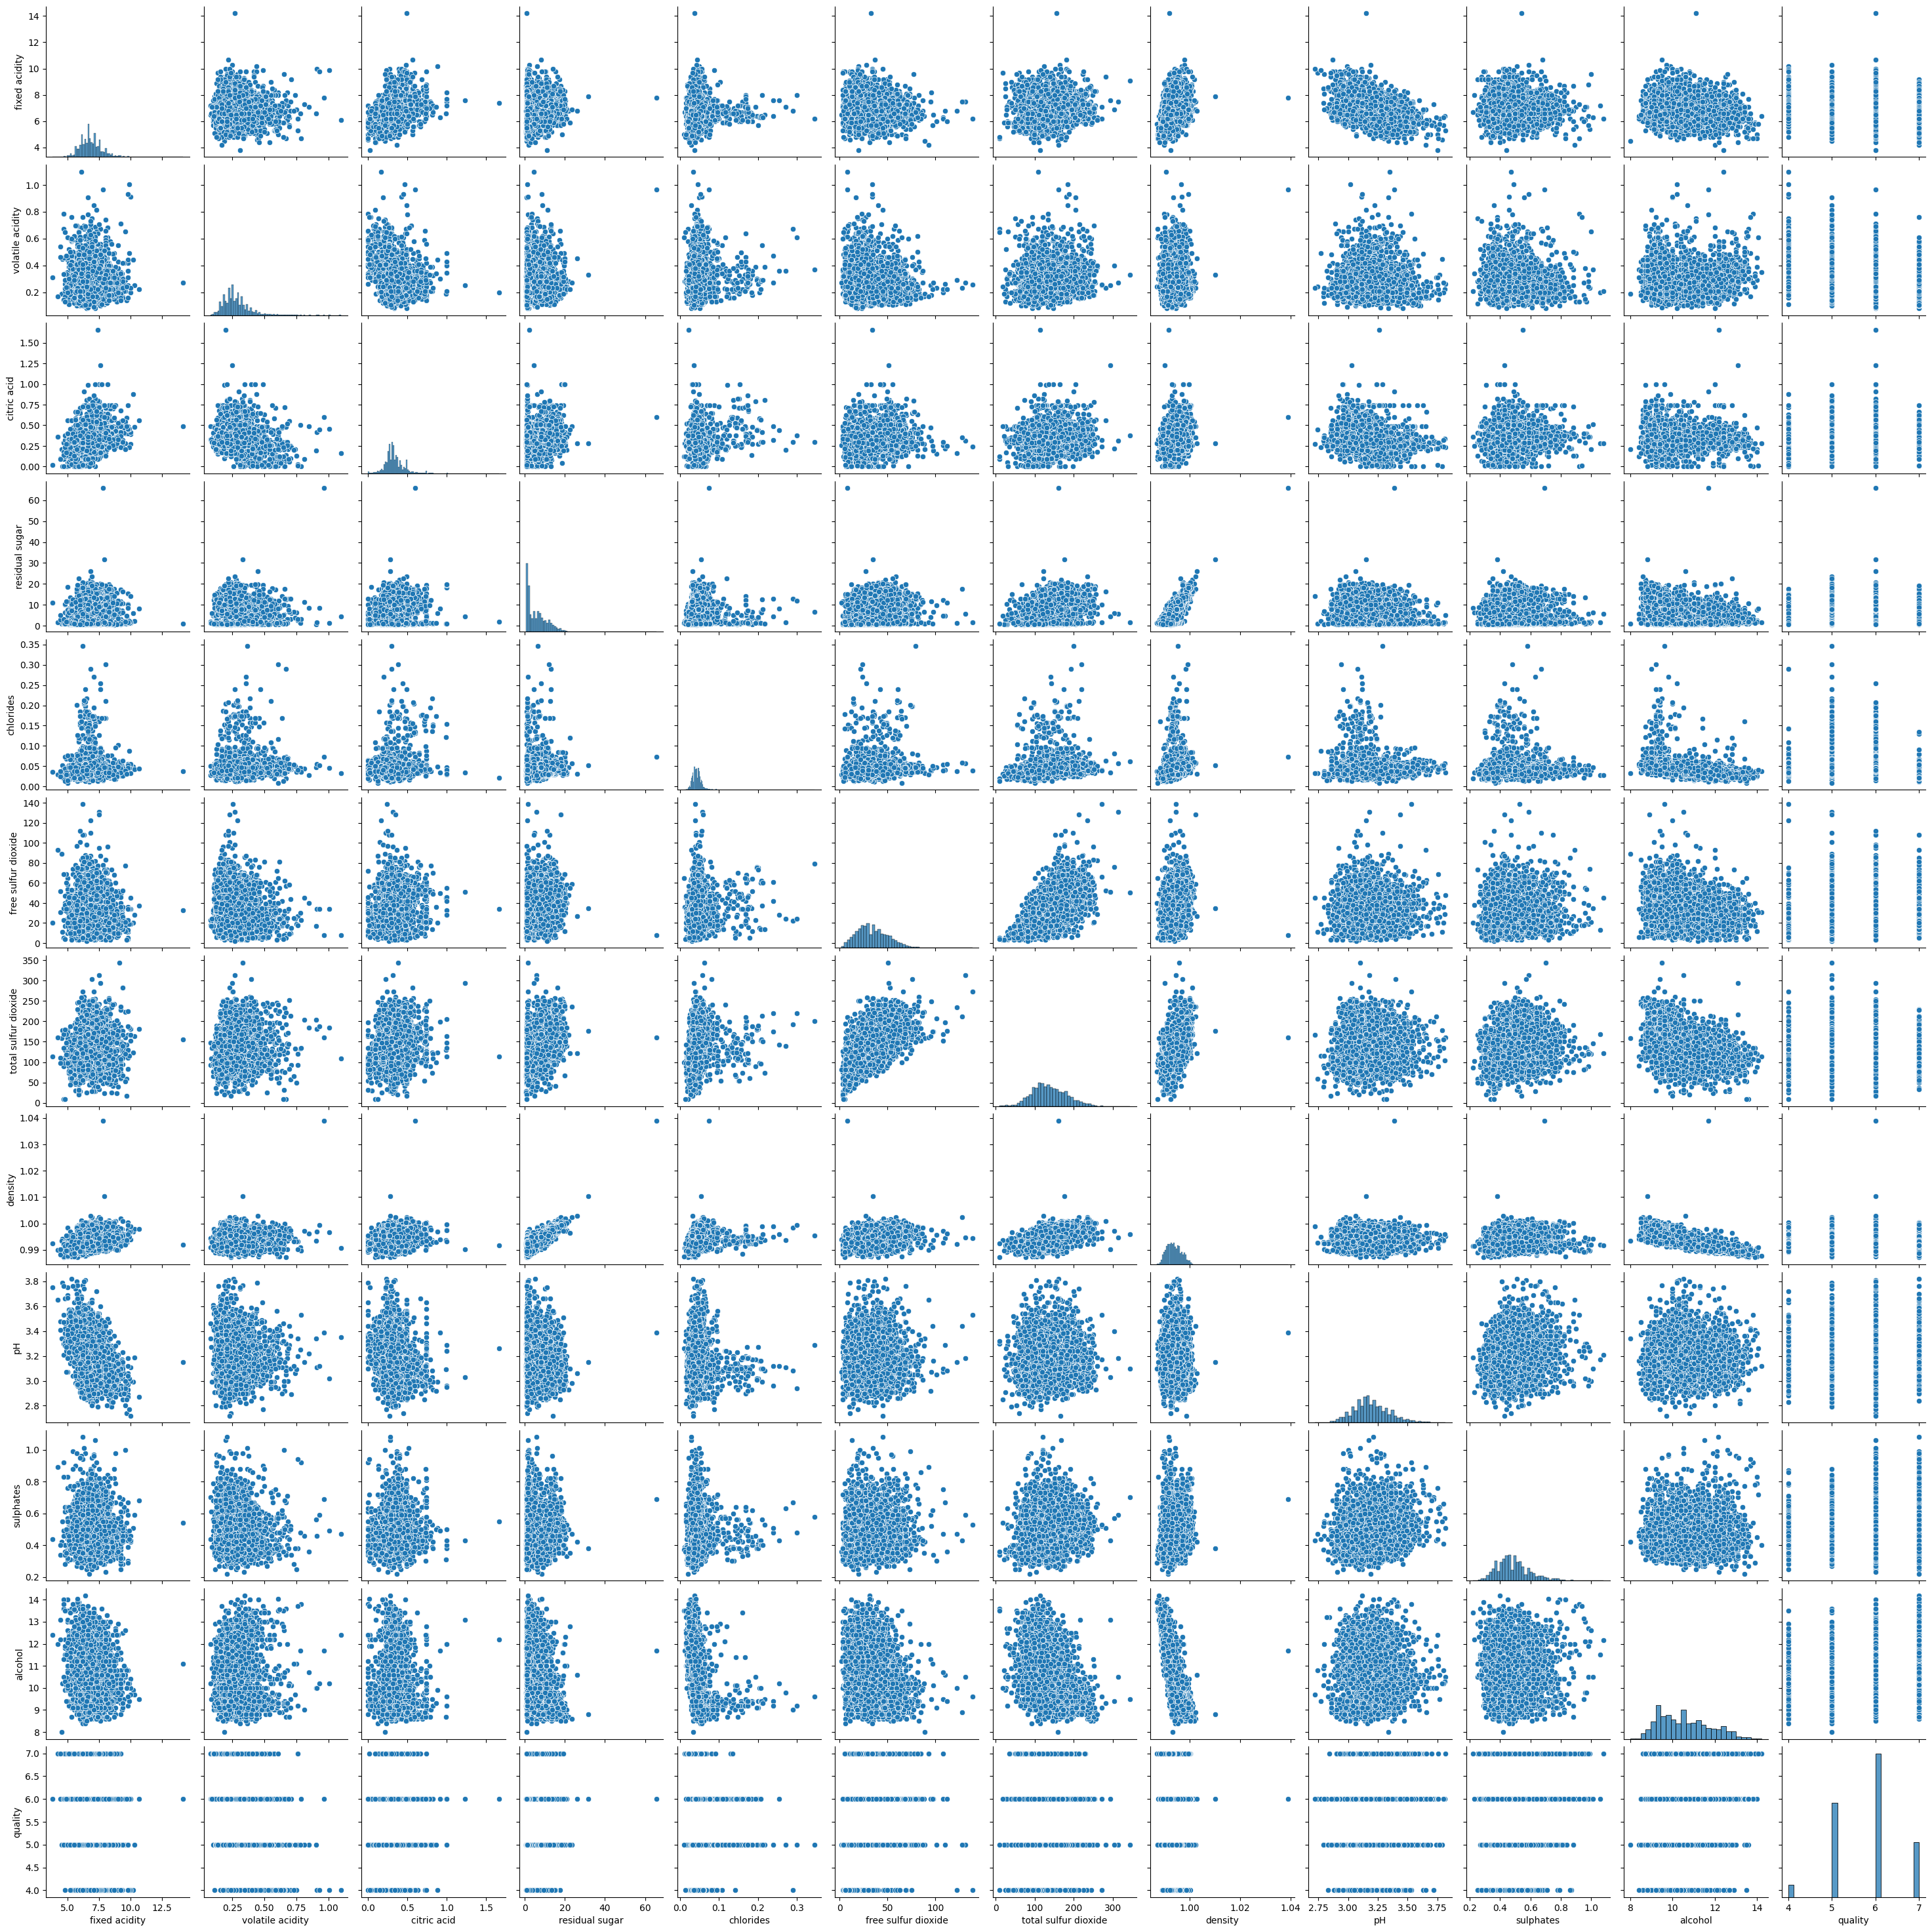

In [32]:
sns.pairplot(df_sin_otl)
plt.show()

In [33]:
# Descripcion estadistica de la variable objetivo sin otl
descripcion = df['quality'].describe()
print('Descripcion estadistica de la variable "Quality"', descripcion)

Descripcion estadistica de la variable "Quality" count    3961.000000
mean        5.854835
std         0.890683
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


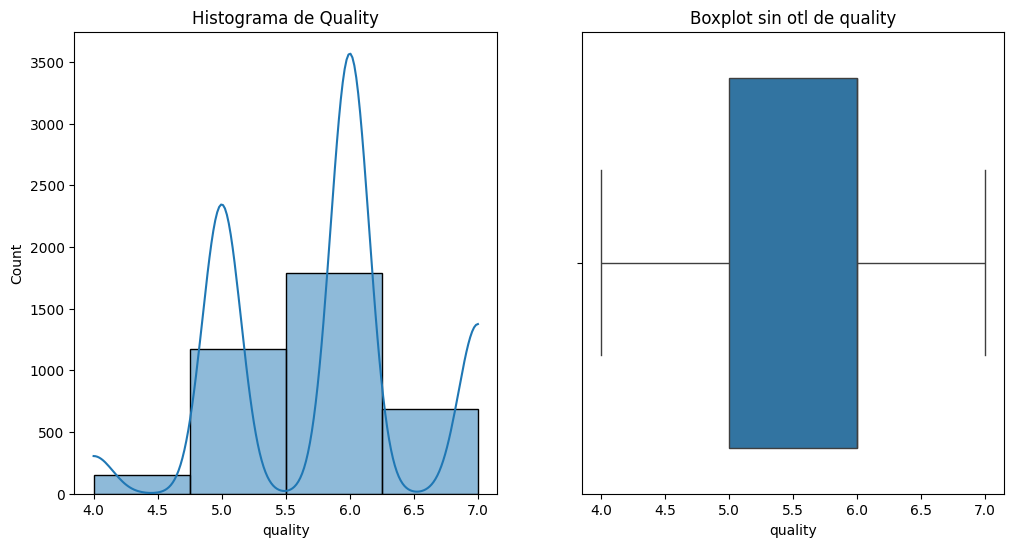

In [34]:
# Visualizar la distribucion de la variable 
plt.figure(figsize=(12,6)) # Crea la figura

plt.subplot(1,2,1) # Crea el primer grafico 
sns.histplot(df_sin_otl['quality'],bins=4, kde= True)
plt.title('Histograma de Quality')

plt.subplot(1,2,2) # Crea el segundo grafico 
sns.boxplot(x=df_sin_otl['quality'])
plt.title('Boxplot sin otl de quality')
plt.show()

In [35]:
# Dividir lo datos en caracteristicas  (X) y objetivo (y)
X = df_sin_otl.drop('quality',axis=1)
y = df_sin_otl['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [59]:
y_test = pd.DataFrame(y_test)


quality
2531        4
655         6
591         6
2119        4
2076        5
...       ...
4486        6
2143        7
1176        7
1855        6
3737        5

[761 rows x 1 columns]

In [55]:
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(y_pred)

In [37]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coeficiente de Determinación (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.42551775558842503
Mean Absolute Error (MAE): 0.5290489835637492
Coeficiente de Determinación (R²): 0.30843244146121773
Root Mean Squared Error (RMSE): 0.6523172200612406


In [38]:
# Resumen del modelo
print("\nIntercepto:", model.intercept_)
print("Coeficientes:", model.coef_)


Intercepto: 104.03868884592077
Coeficientes: [ 4.19298895e-02 -1.55134255e+00  1.80169717e-01  5.34105938e-02
 -6.49190795e-01  5.60166841e-03 -3.10735721e-04 -1.03747161e+02
  6.52740540e-01  5.45731862e-01  2.04261286e-01]


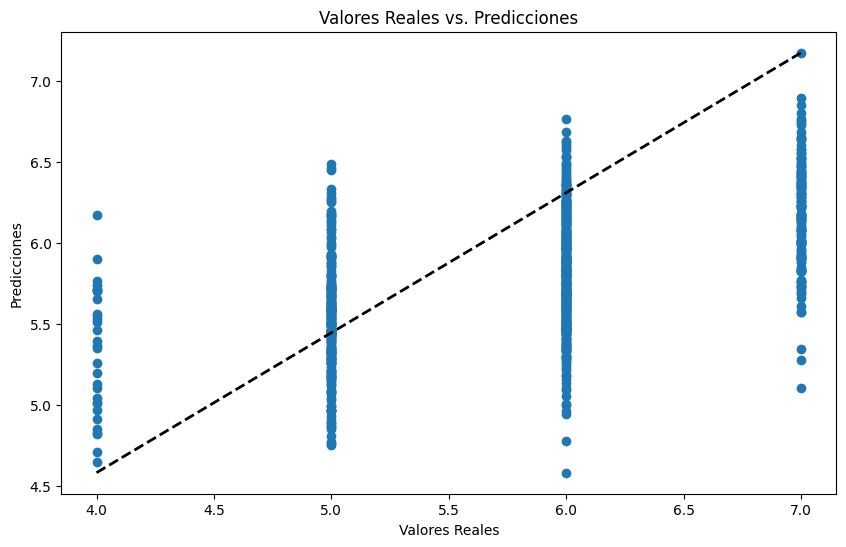

In [39]:
# Visualizar las predicciones vs. los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()

In [95]:
res_df = pd.concat([y_test,y_pred],axis=1, join='inner').reset_index()
res_df.drop(columns='index',inplace=True)
res_df

quality         0
0          6  5.698649
1          6  5.838896
2          6  5.415996
3          6  4.861683
4          5  6.052373
..       ...       ...
140        5  5.106285
141        6  5.917039
142        7  6.481351
143        6  6.170085
144        6  4.998814

[145 rows x 2 columns]

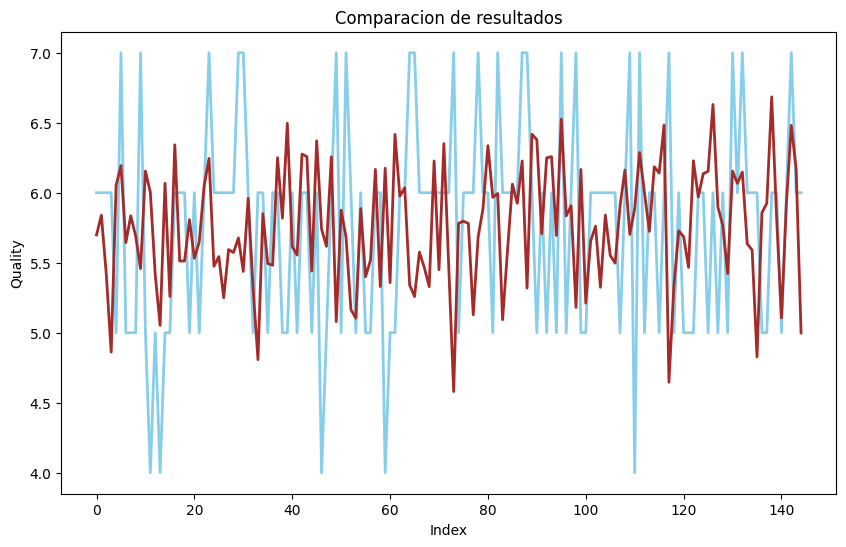

In [94]:
# Crear el gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Quality real
plt.plot(res_df.index, res_df['quality'], label='Quality real', color='skyblue', linewidth=2)
# Predicciones
plt.plot(res_df.index, res_df[0], label='Quality_pred', color='brown', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Index')
plt.ylabel('Quality')
plt.title('Comparacion de resultados')


# Mostrar el gráfico
plt.show()

De los 145 valores de prueba "linea azul" y los 145 valores linea cafe si hay una variacion considerable en cuanto a las predicciones, siendo el mejor de los casos quedarse a a menos de .1 de distancia del valor real y el peor quedandose a mas 1 de distancia del valor real  

In [41]:
df_test = df_sin_otl.copy()
df_test = df_test.sample(frac=0.8)
df_test.drop(columns='quality',inplace=True)
df_test

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3993            6.7             0.280         0.34             8.9      0.048   
540             6.7             0.310         0.31             9.9      0.040   
3333            5.1             0.165         0.22             5.7      0.047   
384             6.0             0.360         0.39             3.2      0.027   
4129            6.3             0.340         0.31             6.0      0.020   
...             ...               ...          ...             ...        ...   
1401            6.3             0.670         0.48            12.6      0.052   
2448            6.6             0.260         0.27             1.5      0.040   
4500            7.8             0.270         0.33             2.4      0.053   
1900           10.0             0.230         0.27            14.1      0.033   
2386            6.9             0.300         0.29             1.3      0.053   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3993                 32.0                 111.0  0.99455  3.25       0.54   
540                  10.0                 175.0  0.99530  3.46       0.55   
3333                 42.0                 146.0  0.99340  3.18       0.55   
384                  20.0                 125.0  0.99100  3.38       0.39   
4129                 18.0                  68.0  0.98981  3.22       0.29   
...                   ...                   ...      ...   ...        ...   
1401                 57.0                 222.0  0.99790  3.17       0.52   
2448                 19.0                 114.0  0.99295  3.36       0.62   
4500                 36.0                 175.0  0.99200  3.20       0.55   
1900                 45.0                 166.0  0.99880  2.72       0.43   
2386                 24.0                 189.0  0.99362  3.29       0.54   

      alcohol  
3993     11.0  
540      11.4  
3333      9.9  
384      11.3  
4129     13.4  
...       ...  
1401      9.3  
2448     10.5  
4500     11.0  
1900      9.7  
2386      9.9  

[3044 rows x 11 columns]

In [42]:
df_test['quality_pred'] = model.predict(df_test)
pd.DataFrame(df_test)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3993            6.7             0.280         0.34             8.9      0.048   
540             6.7             0.310         0.31             9.9      0.040   
3333            5.1             0.165         0.22             5.7      0.047   
384             6.0             0.360         0.39             3.2      0.027   
4129            6.3             0.340         0.31             6.0      0.020   
...             ...               ...          ...             ...        ...   
1401            6.3             0.670         0.48            12.6      0.052   
2448            6.6             0.260         0.27             1.5      0.040   
4500            7.8             0.270         0.33             2.4      0.053   
1900           10.0             0.230         0.27            14.1      0.033   
2386            6.9             0.300         0.29             1.3      0.053   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3993                 32.0                 111.0  0.99455  3.25       0.54   
540                  10.0                 175.0  0.99530  3.46       0.55   
3333                 42.0                 146.0  0.99340  3.18       0.55   
384                  20.0                 125.0  0.99100  3.38       0.39   
4129                 18.0                  68.0  0.98981  3.22       0.29   
...                   ...                   ...      ...   ...        ...   
1401                 57.0                 222.0  0.99790  3.17       0.52   
2448                 19.0                 114.0  0.99295  3.36       0.62   
4500                 36.0                 175.0  0.99200  3.20       0.55   
1900                 45.0                 166.0  0.99880  2.72       0.43   
2386                 24.0                 189.0  0.99362  3.29       0.54   

      alcohol  quality_pred  
3993     11.0      6.016693  
540      11.4      6.026655  
3333      9.9      5.835653  
384      11.3      5.942443  
4129     13.4      6.525634  
...       ...           ...  
1401      9.3      4.962763  
2448     10.5      5.746441  
4500     11.0      5.966008  
1900      9.7      5.450773  
2386      9.9      5.404734  

[3044 rows x 12 columns]

In [43]:
result_merge = pd.merge(df, df_test, left_index=True, right_index=True, how='inner')
result_merge

fixed acidity_x  volatile acidity_x  citric acid_x  residual sugar_x  \
1                 6.3                0.30           0.34              1.60   
2                 8.1                0.28           0.40              6.90   
6                 6.2                0.32           0.16              7.00   
9                 8.1                0.22           0.43              1.50   
10                8.1                0.27           0.41              1.45   
...               ...                 ...            ...               ...   
4893              6.2                0.21           0.29              1.60   
4894              6.6                0.32           0.36              8.00   
4895              6.5                0.24           0.19              1.20   
4896              5.5                0.29           0.30              1.10   
4897              6.0                0.21           0.38              0.80   

      chlorides_x  free sulfur dioxide_x  total sulfur dioxide_x  density_x  \
1           0.049                   14.0                   132.0    0.99400   
2           0.050                   30.0                    97.0    0.99510   
6           0.045                   30.0                   136.0    0.99490   
9           0.044                   28.0                   129.0    0.99380   
10          0.033                   11.0                    63.0    0.99080   
...           ...                    ...                     ...        ...   
4893        0.039                   24.0                    92.0    0.99114   
4894        0.047                   57.0                   168.0    0.99490   
4895        0.041                   30.0                   111.0    0.99254   
4896        0.022                   20.0                   110.0    0.98869   
4897        0.020                   22.0                    98.0    0.98941   

      pH_x  sulphates_x  ...  citric acid_y  residual sugar_y  chlorides_y  \
1     3.30         0.49  ...           0.34              1.60        0.049   
2     3.26         0.44  ...           0.40              6.90        0.050   
6     3.18         0.47  ...           0.16              7.00        0.045   
9     3.22         0.45  ...           0.43              1.50        0.044   
10    2.99         0.56  ...           0.41              1.45        0.033   
...    ...          ...  ...            ...               ...          ...   
4893  3.27         0.50  ...           0.29              1.60        0.039   
4894  3.15         0.46  ...           0.36              8.00        0.047   
4895  2.99         0.46  ...           0.19              1.20        0.041   
4896  3.34         0.38  ...           0.30              1.10        0.022   
4897  3.26         0.32  ...           0.38              0.80        0.020   

      free sulfur dioxide_y  total sulfur dioxide_y  density_y  pH_y  \
1                      14.0                   132.0    0.99400  3.30   
2                      30.0                    97.0    0.99510  3.26   
6                      30.0                   136.0    0.99490  3.18   
9                      28.0                   129.0    0.99380  3.22   
10                     11.0                    63.0    0.99080  2.99   
...                     ...                     ...        ...   ...   
4893                   24.0                    92.0    0.99114  3.27   
4894                   57.0                   168.0    0.99490  3.15   
4895                   30.0                   111.0    0.99254  2.99   
4896                   20.0                   110.0    0.98869  3.34   
4897                   22.0                    98.0    0.98941  3.26   

      sulphates_y  alcohol_y  quality_pred  
1            0.49        9.5      5.227012  
2            0.44       10.1      5.682291  
6            0.47        9.6      5.376569  
9            0.45       11.0      5.773162  
10           0.56       12.0      6.047145  
...           ...        ...           ...  
489

In [44]:
comparacion = result_merge[['quality','quality_pred']].copy()
comparacion['diferencia'] = comparacion['quality_pred'] - comparacion['quality']
comparacion

quality  quality_pred  diferencia
1           6      5.227012   -0.772988
2           6      5.682291   -0.317709
6           6      5.376569   -0.623431
9           6      5.773162   -0.226838
10          5      6.047145    1.047145
...       ...           ...         ...
4893        6      6.058205    0.058205
4894        5      5.597750    0.597750
4895        6      5.293758   -0.706242
4896        7      6.424082   -0.575918
4897        6      6.219853    0.219853

[3044 rows x 3 columns]

In [45]:
x1= comparacion['quality']
x2= comparacion['quality_pred']
y= comparacion.index

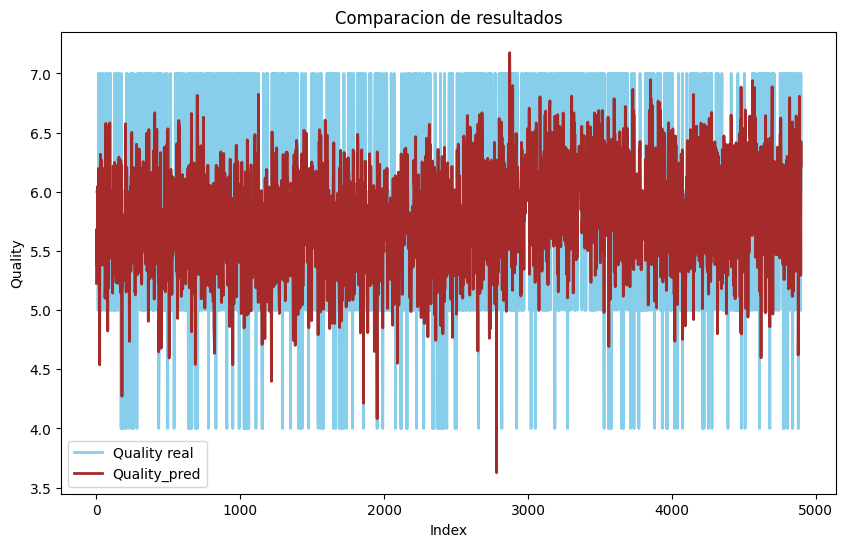

In [46]:
# Crear el gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Quality real
plt.plot(y, x1, label='Quality real', color='skyblue', linewidth=2)
# Predicciones
plt.plot(y, x2, label='Quality_pred', color='brown', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Index')
plt.ylabel('Quality')
plt.title('Comparacion de resultados')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()